# 1.) Preprocess your data into scaled input variables and an output variable


In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV.csv")


In [5]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [6]:
X = df.drop(["Unnamed: 0", "Customer Lifetime Value"], axis = 1)
y = df['Customer Lifetime Value']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
clf = MLPRegressor

In [12]:
MLPRegressor?

In [13]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,),(5,), (10,), (15,)], 
    "activation" : ['relu','logistic']
}

In [14]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20, 5), (5,), (10,),
                                                (15,)]})

In [15]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (20, 5)}


# 3.) Train a model with the optimal solution from GridSearch

In [16]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(20, 5))

In [26]:
MLPRegressor(hidden_layer_sizes = (20, 5), 
             activation = "relu")

MLPRegressor(hidden_layer_sizes=(20, 5))

In [33]:
grid.best_params_["hidden_layer_sizes"]

(20, 5)

# 4.) What are the in-sample and out of sample MSEs

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
in_sample_mse = mean_squared_error(y_train, y_pred_train)

y_pred_test = lr.predict(X_test)
out_of_sample_mse = mean_squared_error(y_test, y_pred_test)

print("In-sample MSE: ", in_sample_mse)
print("Out-of-sample MSE: ", out_of_sample_mse)

In-sample MSE:  42797085.2937791
Out-of-sample MSE:  46027223.52074548


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [39]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = grid.best_params_["hidden_layer_sizes"][0], activation=grid.best_params_['activation'], input_dim = X_train.shape[1]))
for i in grid.best_params_["hidden_layer_sizes"][1:]:
    model.add(Dense(units = i, activation=grid.best_params_["activation"]))

model.add(Dense(units = 1))

model.compile(optimizer='adam',loss = 'mean_squared_error')


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [20]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
pip install --upgrade graphviz pydot pydotplus


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz

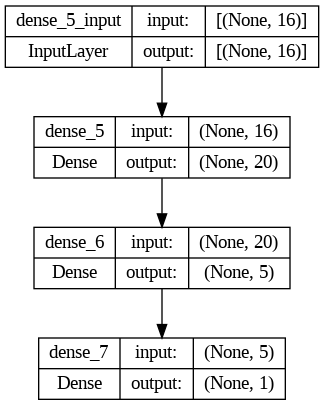

In [40]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [50]:
ann_viz(model, title="My_Neural_Network", view=True)

In [60]:
import graphviz

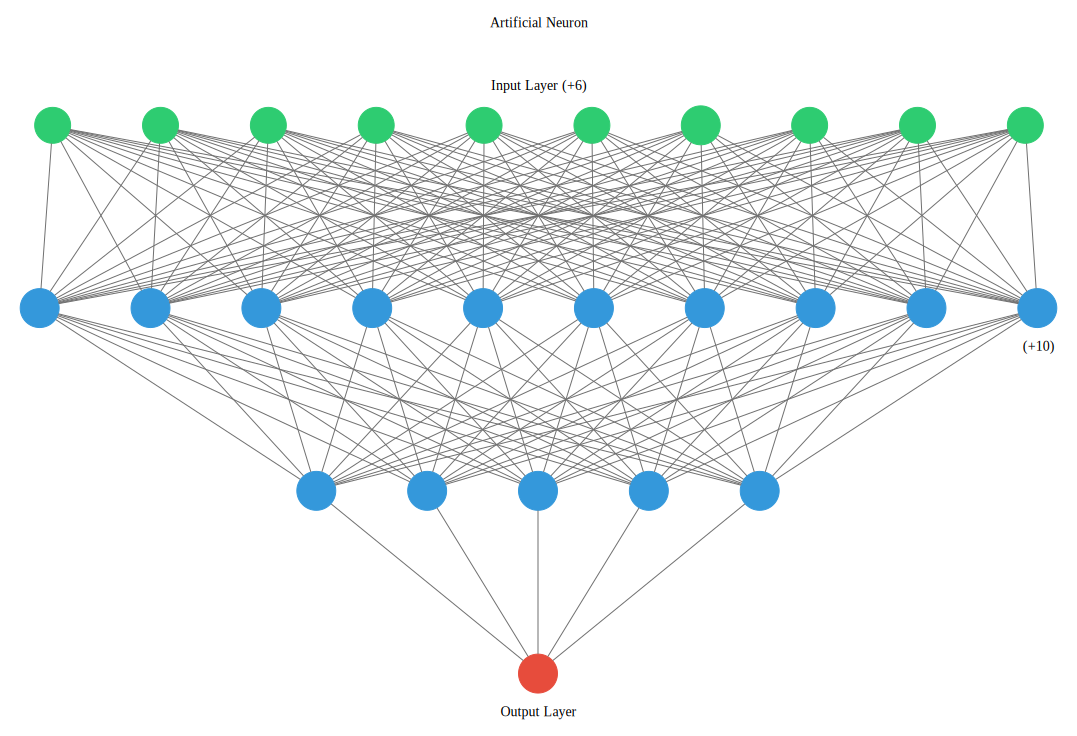

In [66]:
ann_viz(model,filename='1',title='Artificial Neuron')
graph_file = graphviz.Source.from_file('1')
graph_file